# Cancer Prediction

### Birsaneanu Andreea Ruxandra

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [88]:
data=pd.read_csv("cancer_prediction.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,45,0,7.874059,0,0,0,1,30,1,1,1,1,0.352512
1,43,1,3.121150,1,0,0,1,22,1,2,1,1,0.425800
2,48,0,8.366872,0,0,0,7,10,0,1,1,1,0.054635
3,50,0,6.045175,0,0,0,1,14,0,2,1,1,-0.052160
4,46,1,8.128679,1,0,1,2,40,9,1,2,1,-0.147207


In [89]:
col=['age','eventdeath','timecur','chemo','hormonal','amputatic','histtype','diam','posnodes','grade','angioinv','lymphinfi','esr1']

In [90]:
data.columns=col
data.head()

,age,eventdeath,timecur,chemo,hormonal,amputatic,histtype,diam,posnodes,grade,angioinv,lymphinfi,esr1
0,45,0,7.874059,0,0,0,1,30,1,1,1,1,0.352512
1,43,1,3.121150,1,0,0,1,22,1,2,1,1,0.425800
2,48,0,8.366872,0,0,0,7,10,0,1,1,1,0.054635
3,50,0,6.045175,0,0,0,1,14,0,2,1,1,-0.052160
4,46,1,8.128679,1,0,1,2,40,9,1,2,1,-0.147207


In [91]:
data.describe()

,age,eventdeath,timecur,chemo,hormonal,amputatic,histtype,diam,posnodes,grade,angioinv,lymphinfi,esr1
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,43.834101,0.271889,7.327901,0.373272,0.119816,0.414747,1.129032,22.161290,1.225806,2.105991,1.622120,1.244240,-0.256339
std,5.575254,0.445962,3.994658,0.484792,0.325497,0.493817,0.602414,8.578978,2.006858,0.795130,0.863385,0.577572,0.567546
min,26.000000,0.000000,0.271047,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,-1.511655
25%,40.000000,0.000000,4.892539,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000,1.000000,1.000000,1.000000,-0.597746
50%,44.000000,0.000000,6.995209,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,2.000000,1.000000,1.000000,-0.070873
75%,48.000000,1.000000,9.998631,1.000000,0.000000,1.000000,1.000000,28.000000,2.000000,3.000000,3.000000,1.000000,0.163550
max,53.000000,1.000000,18.080767,1.000000,1.000000,1.000000,7.000000,50.000000,13.000000,3.000000,3.000000,3.000000,0.596177


<Figure size 432x288 with 0 Axes>

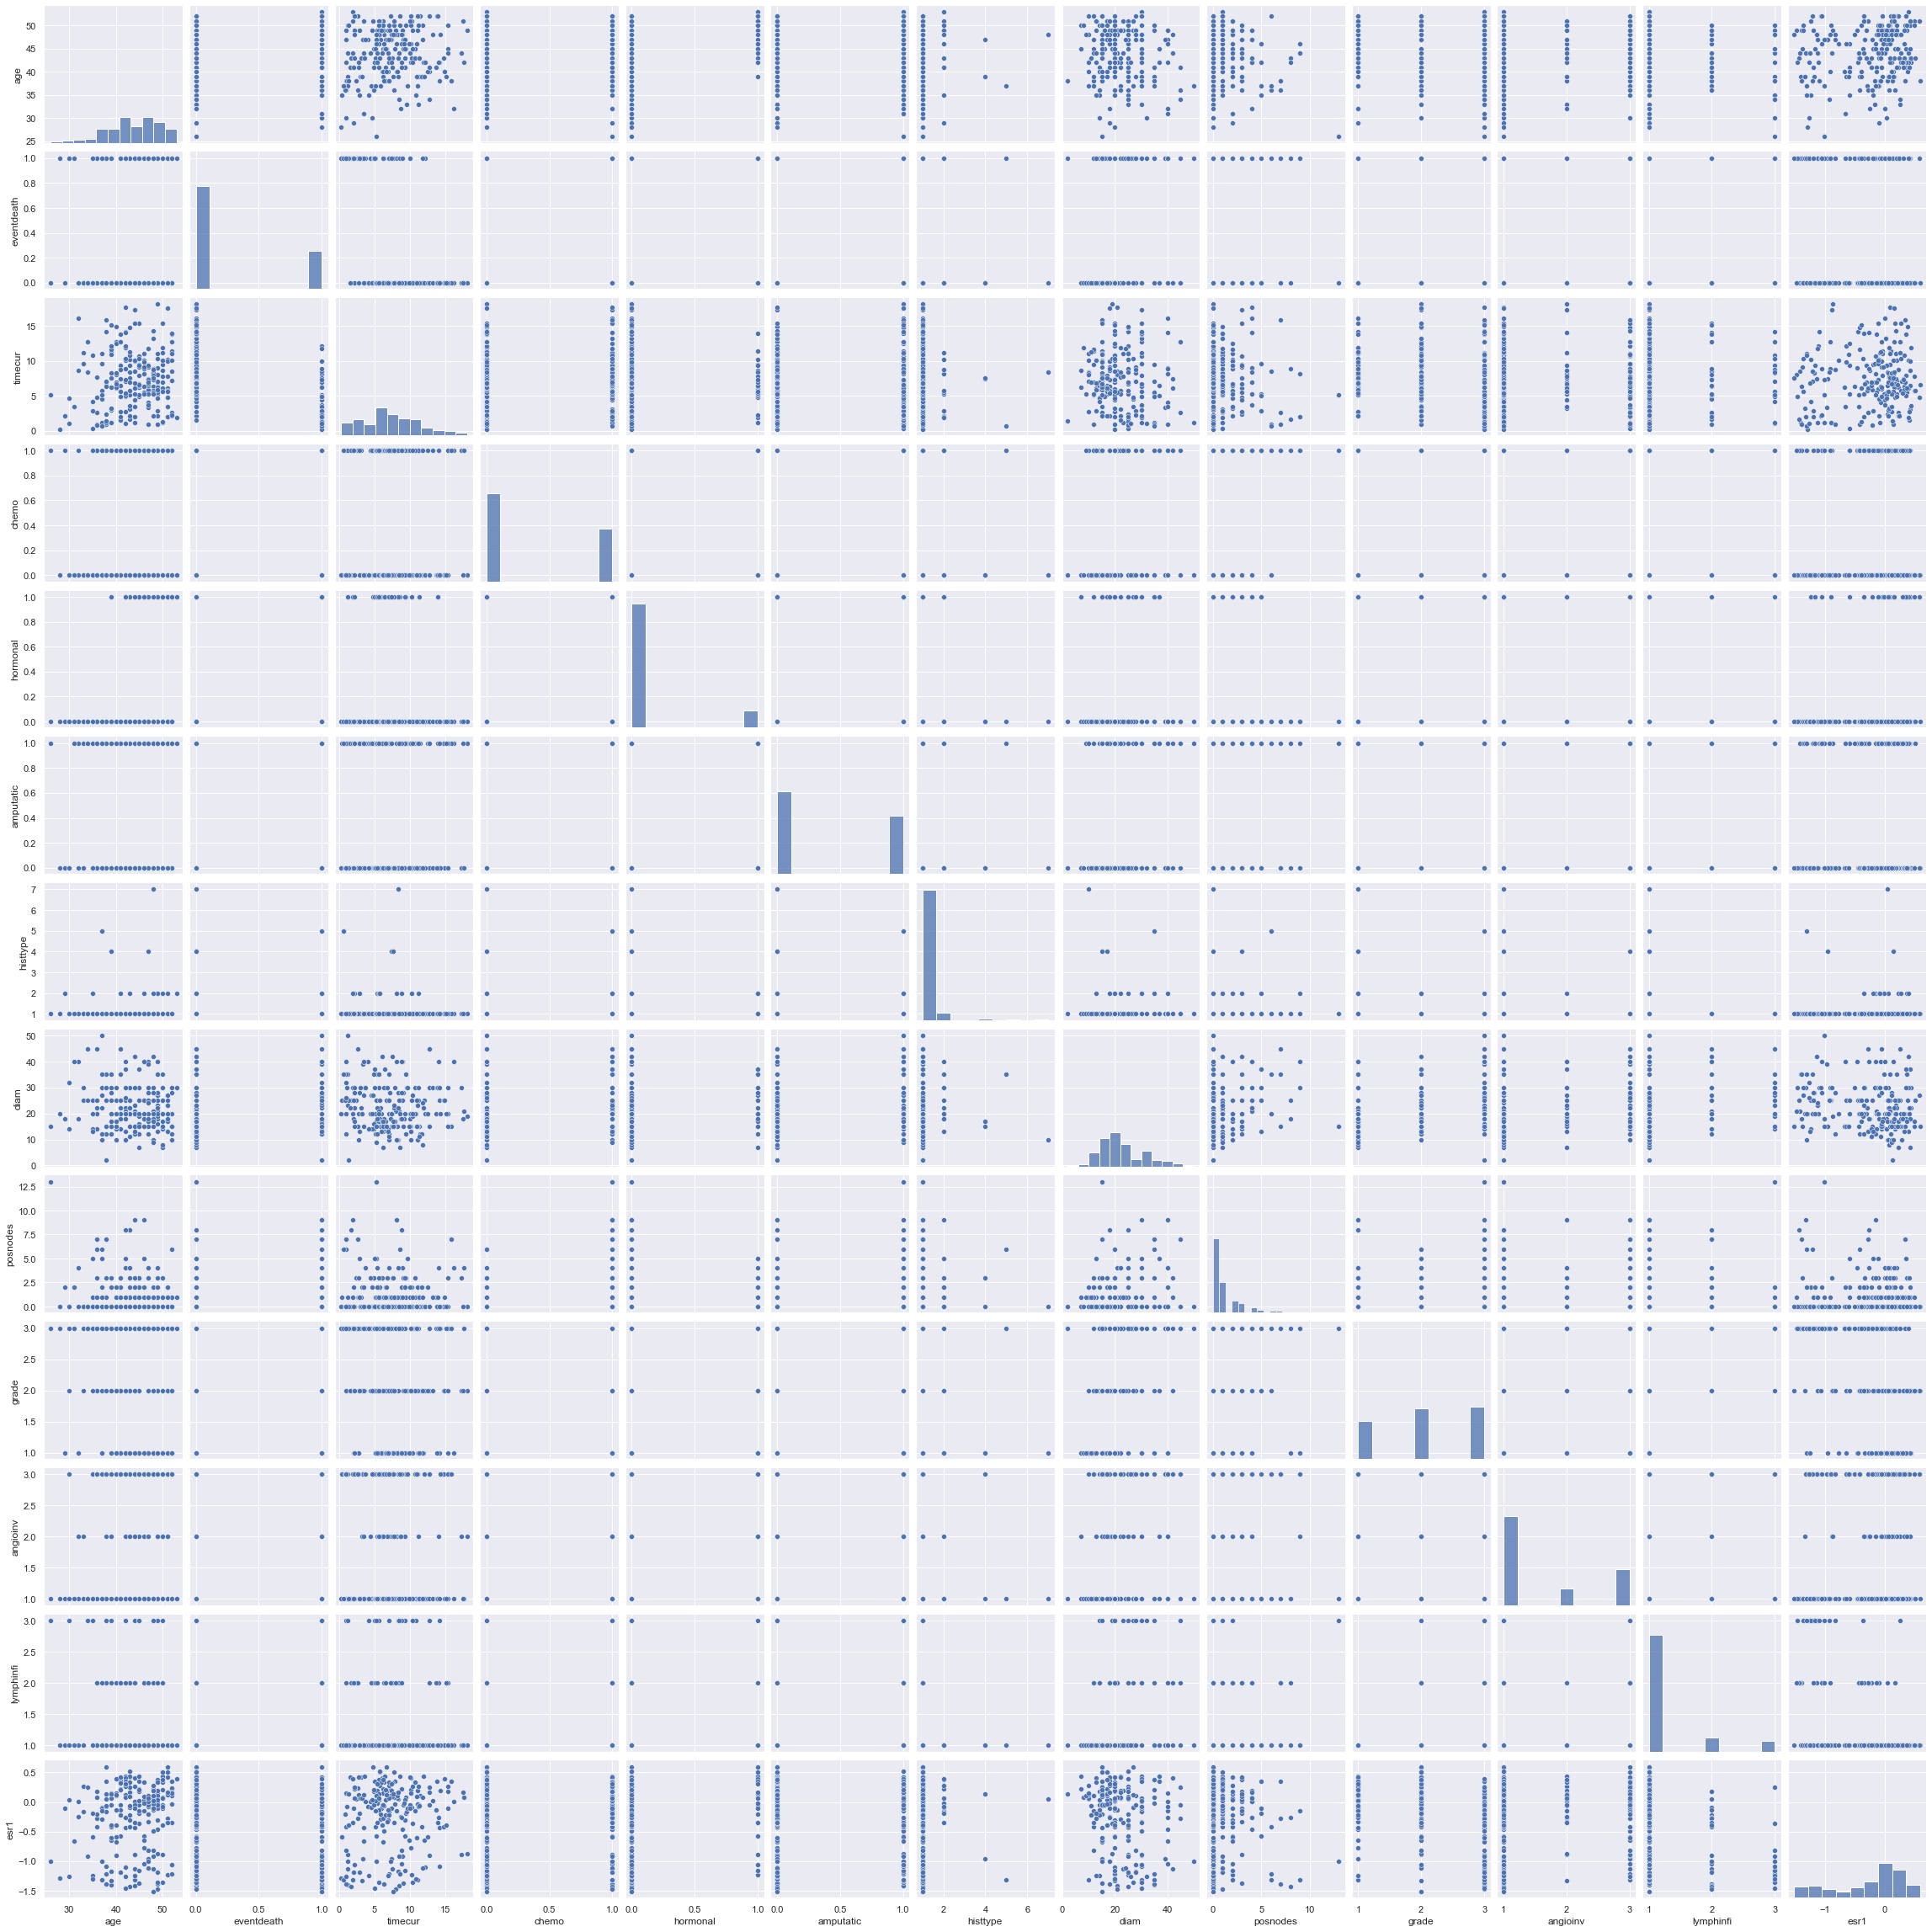

In [92]:
plt.figure()
sns.pairplot(data)
plt.show()

<Figure size 432x288 with 0 Axes>

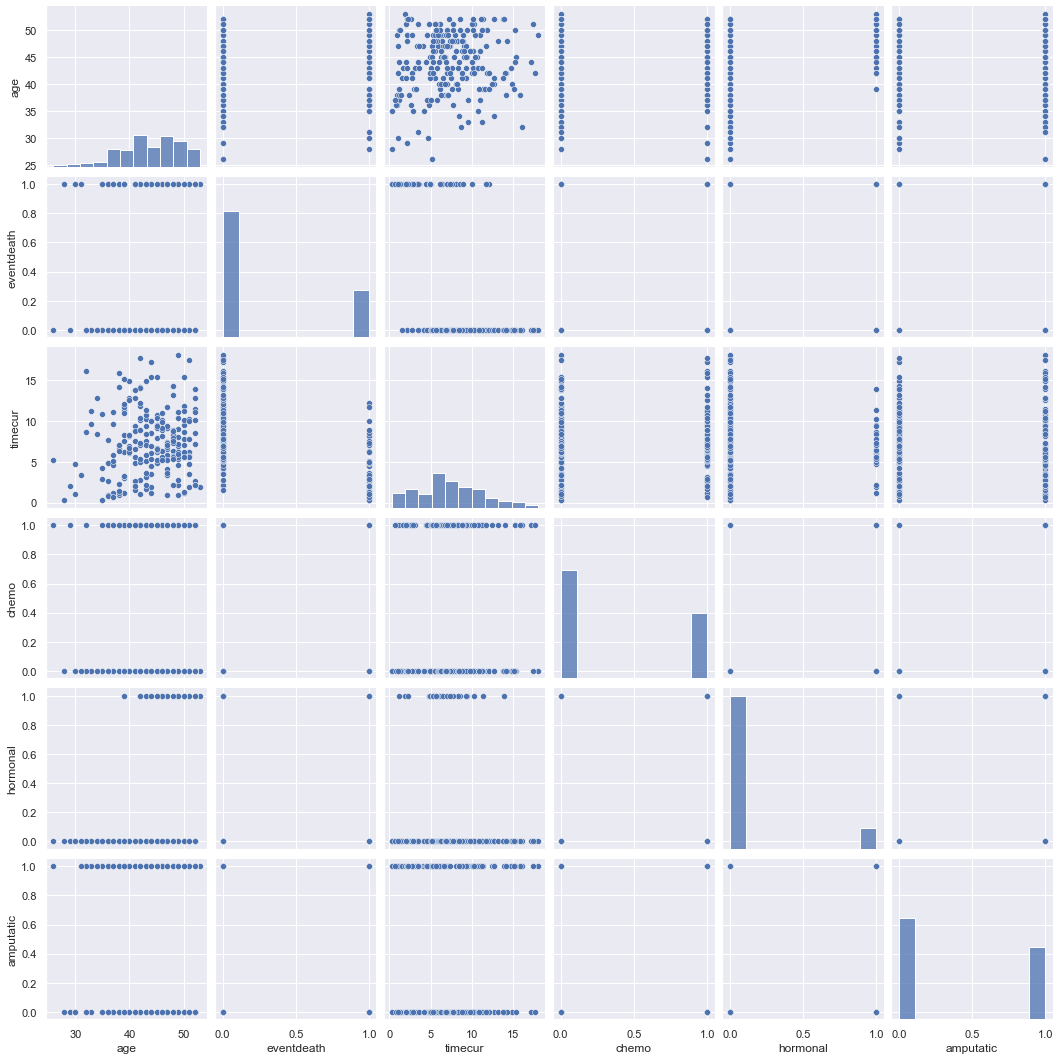

In [94]:
plt.figure()
col1=['age','eventdeath','timecur','chemo','hormonal','amputatic']
sns.pairplot(data[col1])
plt.show()

<Figure size 432x288 with 0 Axes>

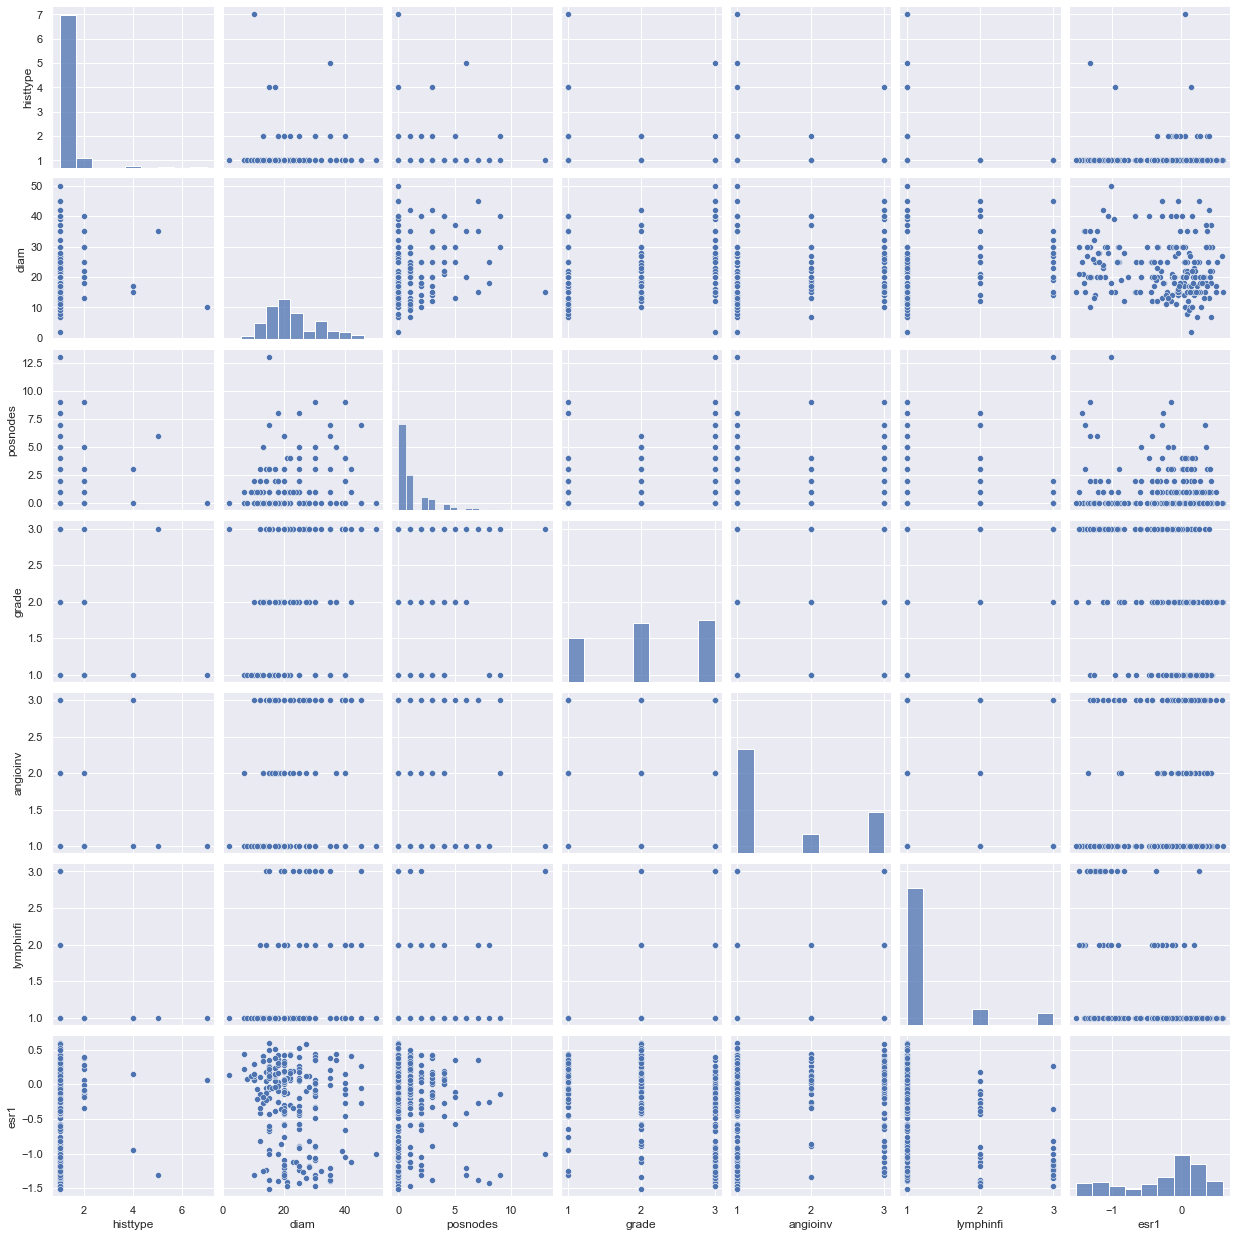

In [95]:
col2=['histtype','diam','posnodes','grade','angioinv','lymphinfi','esr1']
plt.figure()
sns.pairplot(data[col2])
plt.show()

#### Correlation

In [96]:
data.corr()

,age,eventdeath,timecur,chemo,hormonal,amputatic,histtype,diam,posnodes,grade,angioinv,lymphinfi,esr1
age,1.000000,-0.132598,0.105589,-0.040359,0.266118,0.053694,0.013295,-0.059353,-0.173319,-0.153711,0.043661,-0.240398,0.143214
eventdeath,-0.132598,1.000000,-0.578878,-0.086149,-0.097885,0.032163,0.006671,0.196618,0.101789,0.336147,0.183904,-0.025346,-0.260940
timecur,0.105589,-0.578878,1.000000,0.019139,-0.069227,0.009359,-0.080059,-0.055553,-0.052411,-0.126845,-0.106776,0.020534,0.108915
chemo,-0.040359,-0.086149,0.019139,1.000000,0.067331,0.027181,-0.007159,0.073396,0.560127,-0.043060,0.128397,0.003581,0.012392
hormonal,0.266118,-0.097885,-0.069227,0.067331,1.000000,0.092646,-0.008378,0.052733,0.036351,-0.049295,-0.019359,-0.082503,0.127725
amputatic,0.053694,0.032163,0.009359,0.027181,0.092646,1.000000,0.021587,0.262803,0.147983,0.040806,0.021817,-0.080861,0.088493
histtype,0.013295,0.006671,-0.080059,-0.007159,-0.008378,0.021587,1.000000,-0.016587,0.083012,-0.163997,-0.092744,-0.090995,0.003008
diam,-0.059353,0.196618,-0.055553,0.073396,0.052733,0.262803,-0.016587,1.000000,0.174543,0.354474,0.138899,0.195699,-0.190548
posnodes,-0.173319,0.101789,-0.052411,0.560127,0.036351,0.147983,0.083012,0.174543,1.000000,0.080675,0.159023,0.052053,-0.100974
grade,-0.153711,0.336147,-0.126845,-0.043060,-0.049295,0.040806,-0.163997,0.354474,0.080675,1.000000,0.139537,0.427256,-0.454554


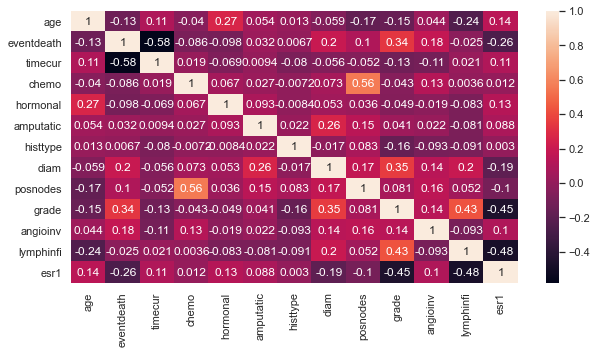

In [97]:
plt.figure(figsize=(10 ,5))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Linear Regression

In [98]:
data.head()

,age,eventdeath,timecur,chemo,hormonal,amputatic,histtype,diam,posnodes,grade,angioinv,lymphinfi,esr1
0,45,0,7.874059,0,0,0,1,30,1,1,1,1,0.352512
1,43,1,3.121150,1,0,0,1,22,1,2,1,1,0.425800
2,48,0,8.366872,0,0,0,7,10,0,1,1,1,0.054635
3,50,0,6.045175,0,0,0,1,14,0,2,1,1,-0.052160
4,46,1,8.128679,1,0,1,2,40,9,1,2,1,-0.147207


In [99]:
X=data['age'].values.reshape(-1,1)
y=data['timecur'].values


In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
linearmod=LinearRegression()
linearmod.fit(X,y)

LinearRegression()

C:\Users\ericsson\anaconda3\envs\python_lab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


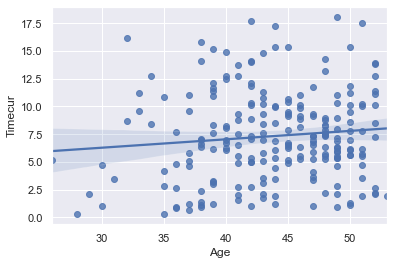

In [102]:
plt.figure()
sns.regplot(X,y)
plt.xlabel('Age')
plt.ylabel('Timecur')
plt.show()

We can notice that we can't use linear regression on this case

Let's try robust regression =>it wont work but we want to compare the results

It will work with polynomial regression

In [103]:
linearmod.predict(np.array(45).reshape(-1,1))

array([7.41610648])

#### Robust Regression

In [104]:
from sklearn.linear_model import RANSACRegressor

In [105]:
X=data['age'].values.reshape(-1,1)
y=data['timecur'].values

In [106]:
robust=RANSACRegressor()
robust.fit(X,y)

RANSACRegressor()

In [107]:
inlier=robust.inlier_mask_
outlier=np.logical_not(inlier)

In [108]:
xline=np.arange(25,55,1)
yline=robust.predict(xline.reshape(-1,1))


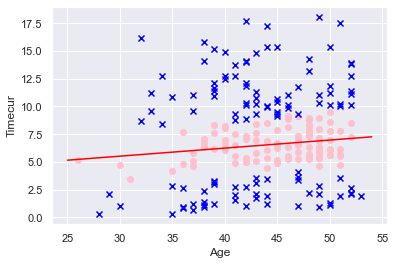

In [109]:
sns.set(style='darkgrid',context='notebook');
plt.figure()
plt.scatter(X[inlier],y[inlier],c='pink',marker='o',label='inlier')
plt.scatter(X[outlier],y[outlier],c='blue',marker='x',label='outlier')
plt.plot(xline,yline,color='red')
plt.xlabel('Age')
plt.ylabel('Timecur')
plt.show()

#### Performance of regresion

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X=data.iloc[:,:-1].values
y=data['timecur'].values

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [113]:
modelreg=LinearRegression()
modelreg.fit(X_train,y_train)

y_train_pred=modelreg.predict(X_train)
y_test_pred=modelreg.predict(X_test)

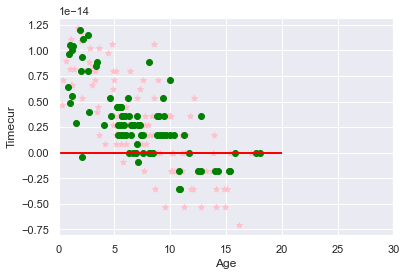

In [125]:
plt.figure()
plt.scatter(y_train_pred,y_train_pred-y_train,c='pink',marker='*',label='Y_train')
plt.scatter(y_test_pred,y_test_pred-y_test,c='green',marker='o',label='Y_test')
plt.xlabel('Age')
plt.ylabel('Timecur')
plt.hlines(y=0,xmin=0,xmax=20,lw=2,color='red')
plt.xlim([0,30])
plt.show()

Because we use linear regression it s lokking like this

In [126]:
from sklearn.metrics import mean_squared_error,r2_score

In [132]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))


2.7538641163199757e-29
2.1950678069237113e-29
1.0
1.0


#### Polynomial regression

In [160]:
from sklearn.preprocessing import PolynomialFeatures
X=data['age'].values.reshape(-1,1)
y=data['timecur'].values

In [161]:
ply=PolynomialFeatures(degree=3)
X_poly=ply.fit_transform(X)



In [167]:
lin=LinearRegression()
lin.fit(X_poly,y.reshape(-1,1))
y_pred=lin.predict(X_poly)

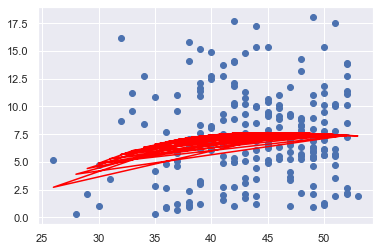

In [168]:
plt.figure()
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
plt.show()


### Non-liniar regression

#### Decision Tree

In [170]:
from sklearn.tree import DecisionTreeRegressor

In [185]:
tree=DecisionTreeRegressor(max_depth=10)

In [186]:
tree.fit(X,y)

DecisionTreeRegressor(max_depth=10)

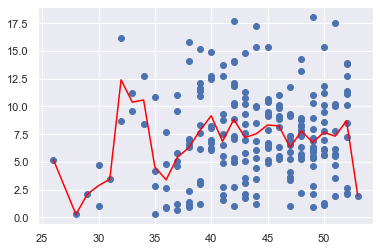

In [187]:
sort=X.flatten().argsort()
plt.figure()
plt.scatter(X[sort],y[sort])
plt.plot(X[sort],tree.predict(X[sort]),color='red')
plt.show()
